---

---

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
import pandas as pd

df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('/datasets/products.csv', delimiter=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
df_departments = pd.read_csv('/datasets/departments.csv', delimiter=';')





In [3]:
# mostrar información del DataFrame
print(df_instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna(0).astype(int)
print(df_instacart_orders.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                      30  
1                       9  
2                       2  
3                      10  
4                      17  


In [5]:
print(df_instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  478967 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB
None


In [6]:
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [7]:
# mostrar información del DataFrame
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [8]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(0).astype(int)
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


In [9]:
# mostrar información del DataFrame
print(df_aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [10]:
# mostrar información del DataFrame
print(df_departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


## Conclusiones

En el dataframe "instacart_orders", se cambió la columna 'days_since_prior_order' de flotante a entero para hacer más fácil el análisis.
En el dataframe "df_products", no se hizo ninguna conversión, ya que el tipo de variable coincide con los datos.
En el dataframe "df_order_products", se hizo la conversión de la columna 'add_to_cart_order' de flotante a entero.
En el dataframe "df_aisles", no se hizo ninguna conversión, ya que el tipo de variable coincide con los datos.
En el dataframe "df_departments", no se hizo ninguna conversión, ya que el tipo de variable coincide con los datos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [11]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders.duplicated().sum())


15


In [12]:
print(df_instacart_orders.duplicated(keep=False))

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool


In [13]:
duplicados = df_instacart_orders[df_instacart_orders.duplicated(keep=False)]
print(duplicados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí, se encontraron 15 líneas duplicadas al aplicar el método duplicated() junto con el método sum(), y se identificó que los valores duplicados se encuentran en order_id y en user_id, ya que se repite la orden del mismo usuario.

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

orders_wednesday_2am = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
print(orders_wednesday_2am)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                        16  
5156                        11  
15506                   

¿Qué sugiere este resultado?

Sugiere eliminar los datos duplicados ya que pertenecen al mismo id y al mismo número de orden.

In [15]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()


In [16]:
# Vuelve a verificar si hay filas duplicadas

print(df_instacart_orders.duplicated().sum())


0


In [17]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

duplicated_ids = df_instacart_orders['order_id'].value_counts()
duplicated_ids = duplicated_ids[duplicated_ids > 1]

print (duplicated_ids.count())


0


In [18]:
duplicados = df_instacart_orders[df_instacart_orders[['order_id', 'user_id']].duplicated(keep=False)]
print(duplicados.count())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [19]:
print(duplicados.head(20))

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [20]:
df_instacart_orders_sin_duplicados = df_instacart_orders.drop_duplicates(subset=['order_id', 'user_id'])
df_instacart_orders_sin_duplicados.reset_index(drop=True, inplace=True)

print(df_instacart_orders_sin_duplicados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                           30  
1                            9  
2                       

Describe brevemente tus hallazgos y lo que hiciste con ellos

Después de analizar los duplicados, se identificó que la orden del cliente se repetía, la cual era la misma. Por tal motivo, se eliminaron del dataframe y, posteriormente, se restableció el dataframe para no alterar el orden de las filas.

### `products` data frame

In [21]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())


0


In [22]:
# Revisa únicamente si hay ID de departamentos duplicados



In [23]:
duplicados_orders = df_products[df_products[['department_id']].duplicated(keep=False)]
print(duplicados_orders.head(20))

    product_id                                       product_name  aisle_id  \
0            1                         Chocolate Sandwich Cookies        61   
1            2                                   All-Seasons Salt       104   
2            3               Robust Golden Unsweetened Oolong Tea        94   
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4            5                          Green Chile Anytime Sauce         5   
5            6                                       Dry Nose Oil        11   
6            7                     Pure Coconut Water With Orange        98   
7            8                  Cut Russet Potatoes Steam N' Mash       116   
8            9                  Light Strawberry Blueberry Yogurt       120   
9           10     Sparkling Orange Juice & Prickly Pear Beverage       115   
10          11                                  Peach Mango Juice        31   
11          12                         Chocolate Fud

In [24]:
print(duplicados_orders.count())

product_id       49694
product_name     48436
aisle_id         49694
department_id    49694
dtype: int64


In [25]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name_upper'] = df_products['product_name'].str.upper()
num_duplicados_productos =  df_products['product_name_upper'].value_counts()
num_duplicados_productos = num_duplicados_productos[num_duplicados_productos > 1]


print (num_duplicados_productos.count())


103


In [26]:
duplicados_product_name = df_products[df_products[['product_name']].duplicated(keep=False)]
print(duplicados_product_name.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 37 to 49668
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          1258 non-null   int64 
 1   product_name        0 non-null      object
 2   aisle_id            1258 non-null   int64 
 3   department_id       1258 non-null   int64 
 4   product_name_upper  0 non-null      object
dtypes: int64(3), object(2)
memory usage: 59.0+ KB
None


In [27]:
print(duplicados_product_name.head(20))

      product_id product_name  aisle_id  department_id product_name_upper
37            38          NaN       100             21                NaN
71            72          NaN       100             21                NaN
109          110          NaN       100             21                NaN
296          297          NaN       100             21                NaN
416          417          NaN       100             21                NaN
436          437          NaN       100             21                NaN
439          440          NaN       100             21                NaN
471          472          NaN       100             21                NaN
490          491          NaN       100             21                NaN
555          556          NaN       100             21                NaN
561          562          NaN       100             21                NaN
613          614          NaN       100             21                NaN
623          624          NaN       10

In [28]:
duplicados_product_name = duplicados_product_name.fillna("desconocido")
duplicados_product_name = duplicados_product_name.drop(columns=['product_name_upper'])
print(duplicados_product_name.head(20))

      product_id product_name  aisle_id  department_id
37            38  desconocido       100             21
71            72  desconocido       100             21
109          110  desconocido       100             21
296          297  desconocido       100             21
416          417  desconocido       100             21
436          437  desconocido       100             21
439          440  desconocido       100             21
471          472  desconocido       100             21
490          491  desconocido       100             21
555          556  desconocido       100             21
561          562  desconocido       100             21
613          614  desconocido       100             21
623          624  desconocido       100             21
689          690  desconocido       100             21
767          768  desconocido       100             21
803          804  desconocido       100             21
890          891  desconocido       100             21
990       

In [29]:
# Revisa si hay nombres duplicados de productos no faltantes

productos_no_faltantes = df_products[df_products['product_name'].notna()]
productos_duplicados = productos_no_faltantes[productos_no_faltantes.duplicated(subset='product_name', keep=False)]

print(productos_duplicados[['product_id', 'product_name']].head(20))


Empty DataFrame
Columns: [product_id, product_name]
Index: []


In [30]:
print(productos_duplicados[['product_id', 'product_name']].count())

product_id      0
product_name    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Al revisar los duplicados en "ID de departamentos", sí se encontraron muchos valores duplicados; sin embargo, no fueron eliminados, ya que repiten el mismo departamento pero con diferentes artículos de compra.

En la columna "product_name" se identificaron duplicados en las columnas "aisle_id" y "department_id"; sin embargo, no fueron eliminados, ya que pertenecen a diferentes productos.

Al analizar los duplicados de productos no faltantes, se identificó que los duplicados se encontraban en la columna "product_name", en los productos cuyo nombre se desconoce y aparecen como valores ausentes ("NaN"). Por tal motivo, no fueron eliminados, ya que se borrarían las ventas de dichos productos, pero fueron reemplazados por "Desconocido".



### `departments` data frame

In [31]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())


0


In [32]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicados_departments_count = df_departments['department_id'].duplicated().sum()

print(duplicados_departments_count)


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron duplicados en los IDS dentro del archivo del departamento.

### `aisles` data frame

In [33]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())


0


In [34]:
# Revisa únicamente si hay IDs duplicadas de pasillos

duplicados_aisle_count = df_aisles['aisle_id'].duplicated().sum()

print(duplicados_aisle_count)


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados de ID en el departamento de pasillos.

### `order_products` data frame

In [35]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())



0


In [36]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

duplicados_engañosos = df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]

print(duplicados_engañosos.count())


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados engañosos en el data frame "df_order_products"

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [37]:
# Encuentra los valores ausentes en la columna 'product_name'

print(df_products.isna().sum())

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_upper    1258
dtype: int64


In [38]:
ausentes_product_name = df_products['product_name'].isna()
print(ausentes_product_name)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


In [39]:
df_products['product_name'].fillna('Desconocido', inplace=True)
print(df_products)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  \
0            61             19   
1           104             13   
2            94              7   

Describe brevemente cuáles son tus hallazgos.

Se detectó que los valores ausentes se encontraban en el nombre del producto, por lo cual fueron llenados con la leyenda "'Desconocido"

In [40]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

productos_ausentes = df_products[df_products['product_name'].isna()]
todos_pasillo_100 = (productos_ausentes['aisle_id'] == 100).all()


if todos_pasillo_100:
    print("Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.")
else:
    print("No todos los productos con nombre ausente están relacionados con el pasillo con ID 100.")



Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.


Describe brevemente cuáles son tus hallazgos.

Haciendo el análisis, se detectó que todos los nombres de productos ausentes están relacionados con el pasillo 100.

In [41]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

productos_ausentes = df_products[df_products['product_name'].isna()]
todos_pasillo_21 = (productos_ausentes['aisle_id'] == 21).all()


if todos_pasillo_21:
    print("Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.")
else:
    print("No todos los productos con nombre ausente están relacionados con el pasillo con ID 100.")



Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.


Describe brevemente cuáles son tus hallazgos.

Haciendo el análisis, se detectó que no todos los nombres de productos ausentes están relacionados con el departamento con el ID 21.

In [42]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

productos_pasillo_100_departamento_21 = df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]

productos_completos = pd.merge(productos_pasillo_100_departamento_21, df_aisles, on='aisle_id', how='left')
productos_completos = pd.merge(productos_completos, df_departments, on='department_id', how='left')

print(productos_completos[['product_id', 'product_name', 'aisle_id', 'aisle', 'department_id', 'department']])


      product_id product_name  aisle_id    aisle  department_id department
0             38  Desconocido       100  missing             21    missing
1             72  Desconocido       100  missing             21    missing
2            110  Desconocido       100  missing             21    missing
3            297  Desconocido       100  missing             21    missing
4            417  Desconocido       100  missing             21    missing
...          ...          ...       ...      ...            ...        ...
1253       49553  Desconocido       100  missing             21    missing
1254       49575  Desconocido       100  missing             21    missing
1255       49641  Desconocido       100  missing             21    missing
1256       49664  Desconocido       100  missing             21    missing
1257       49669  Desconocido       100  missing             21    missing

[1258 rows x 6 columns]


Describe brevemente cuáles son tus hallazgos.

Se detecto que los nombres de los productos en estos dos pasillos tienen valores ausentes.

In [43]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products['product_name'].isna().sum())



0


In [44]:
productos_unknown = df_products[df_products['product_name'] == 'Unknown']

print(productos_unknown.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          0 non-null      int64 
 1   product_name        0 non-null      object
 2   aisle_id            0 non-null      int64 
 3   department_id       0 non-null      int64 
 4   product_name_upper  0 non-null      object
dtypes: int64(3), object(2)
memory usage: 0.0+ bytes
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues de identificar los valores ausentes en los nombres de los pasillos, se remplazo "NaN" por 'Unknown'

### `orders` data frame

In [45]:
# Encuentra los valores ausentes
print(df_instacart_orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [46]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

primeros_pedidos = df_instacart_orders[df_instacart_orders['order_number'] == 1]
primeros_pedidos_ausentes = primeros_pedidos[primeros_pedidos['days_since_prior_order'].isna()]
otros_pedidos_ausentes = df_instacart_orders[(df_instacart_orders['order_number'] > 1) & df_instacart_orders['days_since_prior_order'].isna()]

print("Valores ausentes solo para primeros pedidos:")
print(primeros_pedidos_ausentes[['order_id', 'user_id', 'order_number', 'days_since_prior_order']])


Valores ausentes solo para primeros pedidos:
Empty DataFrame
Columns: [order_id, user_id, order_number, days_since_prior_order]
Index: []


In [47]:
if otros_pedidos_ausentes.empty:
    print("\nNo hay valores ausentes en 'days_since_prior_order' que no sean para el primer pedido.")
else:
    print("\nExisten valores ausentes en 'days_since_prior_order' que no son para el primer pedido.")


No hay valores ausentes en 'days_since_prior_order' que no sean para el primer pedido.


In [48]:

df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna('0')
print(df_instacart_orders.sample(10))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
430691   2418551   137574            11          1                 10   
421800    190882    52831            16          0                  8   
224101    252299   159515             4          4                 14   
148013   2202439   184272            23          4                 16   
178932   3062017    85910             9          6                 17   
57990     261498   128634             3          3                 12   
38305    3055681   124587            11          6                  8   
114055    237906   110566             7          0                 15   
403305   1276003   177507             1          1                 20   
471144    829336    68121             2          1                 11   

        days_since_prior_order  
430691                      30  
421800                       7  
224101                       5  
148013                       6  
178932                       7 

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Primero filtrar los primeros pedidos de cada cliente (order_number == 1), Verificar los valores ausentes en 'days_since_prior_order' para los primeros pedidos y tambien para los demás pedidos y se encontró que no hay valores ausentes en 'days_since_prior_order' que no sean para el primer pedido. Ademas de que se llenaron los valores ausentes de la columna 'days_since_prior_order' a cero.

### `order_products` data frame

In [49]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [50]:
print(df_order_products['add_to_cart_order'].head(20))

0     17
1      1
2      1
3     35
4      5
5      4
6      5
7     10
8     14
9      4
10     2
11    28
12    10
13     3
14     1
15    16
16     1
17     8
18     7
19     5
Name: add_to_cart_order, dtype: int64


In [51]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products.max())


order_id             3421079
product_id             49694
add_to_cart_order         64
reordered                  1
dtype: int64


In [52]:
print(df_order_products.min())

order_id             4
product_id           1
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Mediante el método min() y max(), se obtuvieron los valores mínimos y máximos de la columna.

In [53]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

valores_ausentes_pedidos = df_order_products[df_order_products['add_to_cart_order'].isna()]

print(valores_ausentes_pedidos.head(10))




Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [54]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

productos_por_pedido = valores_ausentes_pedidos.groupby('order_id').size()
todos_mas_de_64 = (productos_por_pedido > 64).all()

if todos_mas_de_64:
    print("Todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos.")
else:
    print("No todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos.")


Todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos.


In [55]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

conteo_productos_por_pedido = valores_ausentes_pedidos.groupby('order_id')['product_id'].count()
print(conteo_productos_por_pedido.head(10))

Series([], Name: product_id, dtype: int64)


In [56]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo

valor_minimo_conteo = conteo_productos_por_pedido.min()
print(f"El valor mínimo del conteo de productos en los pedidos con datos ausentes es: {valor_minimo_conteo}")

El valor mínimo del conteo de productos en los pedidos con datos ausentes es: nan


Describe brevemente cuáles son tus hallazgos.

Despues de hacer el analisis se identifico que todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos y tambien que el valor mínimo del conteo de productos en los pedidos con datos ausentes es: 1.

In [57]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
print(df_order_products.sample(10))




         order_id  product_id  add_to_cart_order  reordered
3922358   1519851       19348                  3          1
908991     742017       20197                  6          0
3688967   1666698        2966                 11          0
3535024   1551979       22006                  9          1
1033585   1167680       13176                  7          1
1368069   2553246       35976                  7          0
2978692   2743298       27966                  2          1
3092997    194230       46979                  1          0
3417063   1406941       42495                 16          1
4002075    867953       44275                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Es importante chequear y siempre analizar qué hacer con los valores ausentes y duplicados, como en el caso de estos DataFrames, para que no afecten el análisis posterior.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [58]:

print(df_instacart_orders.head(15))

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0    1515936   183418            11          6                 13   
1    1690866   163593             5          5                 12   
2    1454967    39980             4          5                 19   
3    1768857    82516            56          0                 20   
4    3007858   196724             2          4                 12   
5    1843871    20084             5          0                 11   
6    2511640   148233            40          3                  8   
7    2521283    97711             2          0                 18   
8    2266494    34954            40          5                 15   
9     446014    15356             2          4                  8   
10   1162566    43738            33          4                 11   
11    102585   191558            18          6                 16   
12   2276302   190167            21          1                 12   
13    782916    36310            3

In [59]:
valores_sensibles_hora = df_instacart_orders.query('order_hour_of_day < 0 or order_hour_of_day > 23')
print("Valores sensibles en 'order_hour_of_day':")

Valores sensibles en 'order_hour_of_day':


In [60]:
valores_sensibles_dia = df_instacart_orders.query('order_dow < 0 or order_dow > 6')
print("Valores inválidos en 'order_dow':")

Valores inválidos en 'order_dow':


Escribe aquí tus conclusiones

Después de analizar los valores mediante Query, se detectó que los datos son razonables y oscilan entre 0 y 23 en 'order_hour_of_day' y entre 0 y 6 en 'order_dow'.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [61]:
orders_by_hour = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

print(orders_by_hour)

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


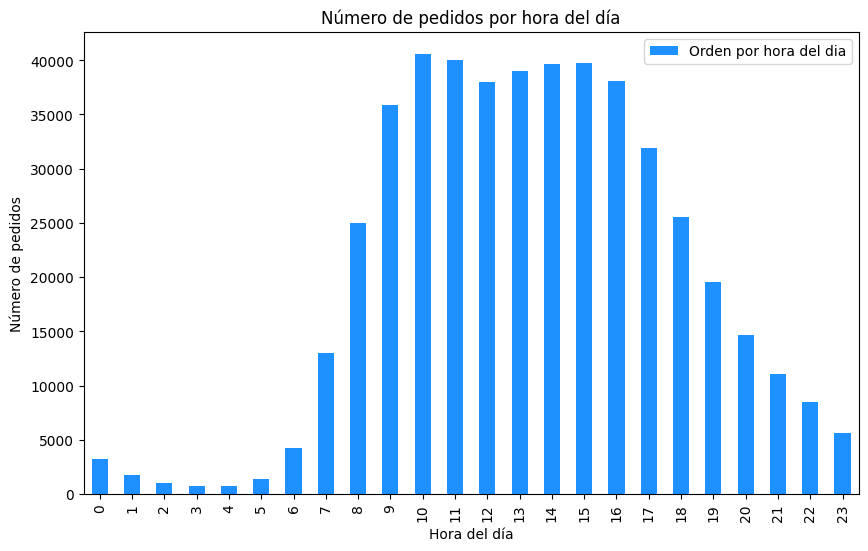

In [62]:
import pandas as pd
from matplotlib import pyplot as plt

df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

orders_by_hour.plot(kind='bar',
                    color='dodgerblue',
                    figsize=(10, 6),
                    legend='y',
                    title='Número de pedidos por hora del día',
                    xlabel='Hora del día',
                    ylabel='Número de pedidos')

plt.legend(['Orden por hora del dia'])

plt.show()

In [63]:
orders_by_hour = df_instacart_orders['order_hour_of_day'].value_counts().sort_values(ascending=False)
print(orders_by_hour)

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: order_hour_of_day, dtype: int64


Escribe aquí tus conclusiones

Después de hacer el análisis y la gráfica correspondiente, se identificó que el promedio de cuántas órdenes hacen las personas en cada hora del día varía mucho, siendo la hora 10 en la que las personas hacen más pedidos, con un total de 40,578, y siendo la hora 4 en la que menos pedidos se hacen, con un total de 765.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [64]:
orders_by_day = df_instacart_orders['order_dow'].value_counts().sort_index()

print(orders_by_day)

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


In [65]:
orders_by_day_sorted = orders_by_day.sort_values(ascending=False)

print(orders_by_day_sorted)

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64


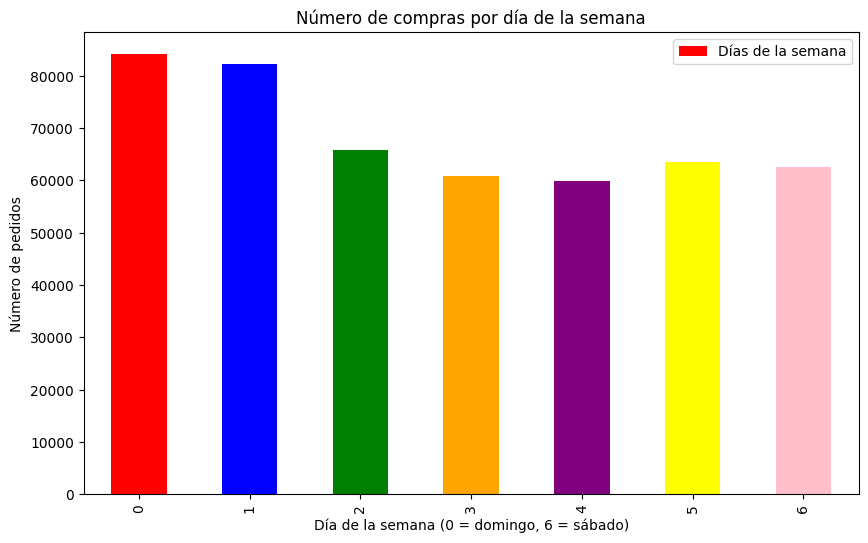

In [66]:
colores = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']

orders_by_day.plot(kind='bar',
                   color=colores,
                   figsize=(10, 6),
                   title='Número de compras por día de la semana',
                   legend='0 = domingo',
                   xlabel='Día de la semana (0 = domingo, 6 = sábado)',
                   ylabel='Número de pedidos')

plt.legend(['Días de la semana'])

plt.show()

Escribe aquí tus conclusiones

En el análisis, se identificó que el día en el que más compras de víveres hacen los usuarios es el día domingo, con un total de 84,090, y el día en el que menos hacen compras es el día jueves, con un total de 59,810.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [67]:
min_days = df_instacart_orders['days_since_prior_order'].min()
max_days = df_instacart_orders['days_since_prior_order'].max()
mean_days = df_instacart_orders['days_since_prior_order'].mean()

In [68]:
print(f'Valor mínimo de días entre pedidos: {min_days}')
print(f'Valor máximo de días entre pedidos: {max_days}')
print(f'Valor promedio de días entre pedidos: {mean_days}')

Valor mínimo de días entre pedidos: 0.0
Valor máximo de días entre pedidos: 30.0
Valor promedio de días entre pedidos: 11.101750979677794


Text(0, 0.5, 'Frecuencia')

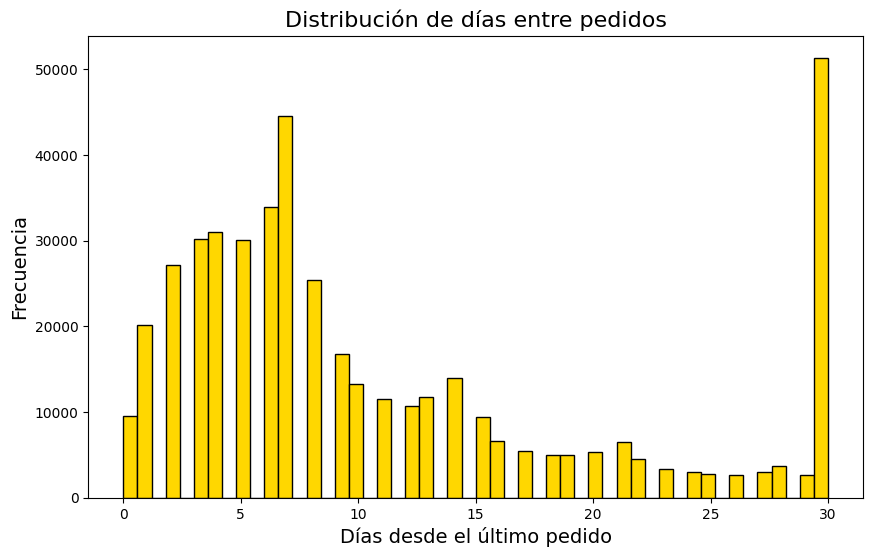

In [69]:
df_instacart_orders['days_since_prior_order'].plot(kind='hist',
                                                   bins=50,
                                                   color='gold',
                                                   figsize=(10, 6),
                                                   edgecolor='black')

plt.title('Distribución de días entre pedidos', fontsize=16)
plt.xlabel('Días desde el último pedido', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)



Escribe aquí tus conclusiones

Al analizar los datos, se detectó que el valor mínimo de días entre pedidos es de 0, el valor máximo de días entre pedidos es de 30 y el valor promedio de días entre pedidos es de 10.43376892353753. Siendo el valor máximo de días el número 30, como se puede notar en la tabla.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [70]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]

In [71]:
print(wednesday_orders['order_hour_of_day'].value_counts().sort_index())

0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64


In [72]:
print(wednesday_orders['order_hour_of_day'].value_counts().sort_values(ascending=False))

15    5163
10    5026
11    5004
16    4976
14    4774
12    4688
13    4674
9     4490
17    4175
18    3463
8     3125
19    2652
20    1917
7     1732
21    1450
22    1154
23     718
6      643
0      373
1      215
5      170
2      121
4      108
3      101
Name: order_hour_of_day, dtype: int64


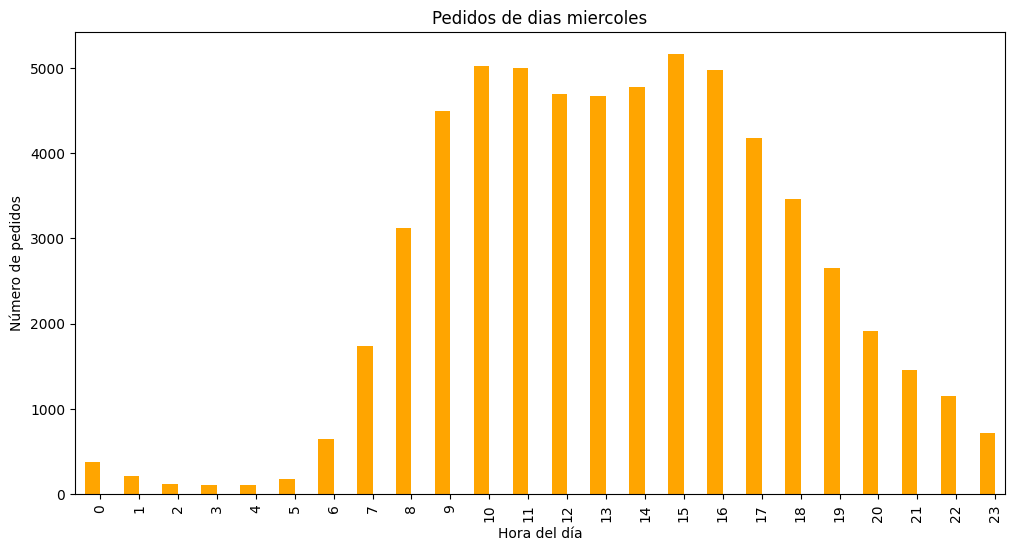

In [73]:
wednesday_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                       color='orange',
                                                                       figsize=(12, 6),
                                                                       position=1, 
                                                                       width=0.4,
                                                                       title='Pedidos de dias miercoles',
                                                                       xlabel='Hora del día',
                                                                       ylabel='Número de pedidos')

plt.show()

In [74]:
print(saturday_orders['order_hour_of_day'].value_counts().sort_values(ascending=False))

14    5375
13    5323
15    5188
12    5132
11    5116
16    5029
10    4919
9     4311
17    4295
18    3338
8     3246
19    2610
20    1847
7     1619
21    1473
22    1185
23     893
0      464
6      451
1      254
2      177
5      161
3      125
4      118
Name: order_hour_of_day, dtype: int64


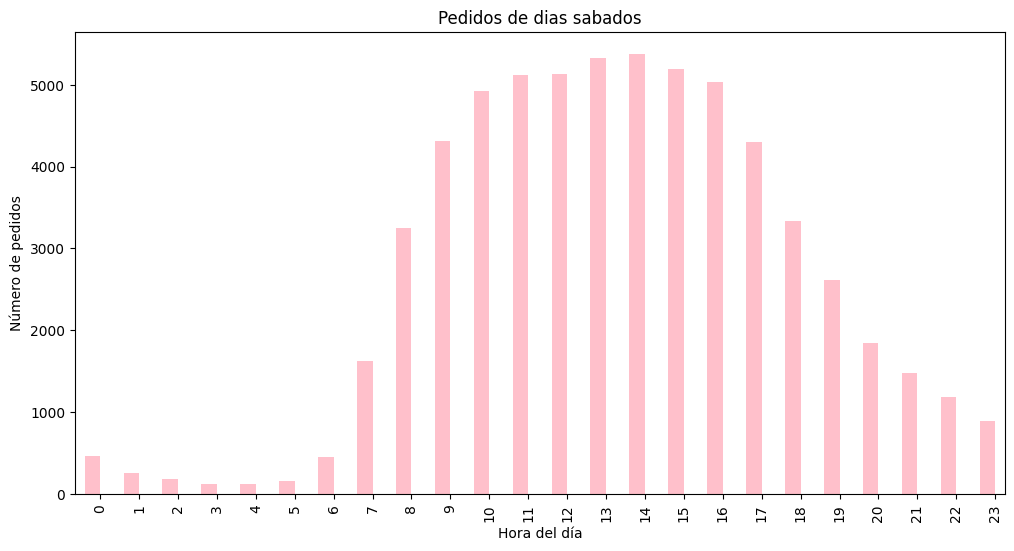

In [75]:
saturday_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                       color='pink',
                                                                       figsize=(12, 6),
                                                                       position=1, 
                                                                       width=0.4,
                                                                       title='Pedidos de dias sabados',
                                                                       xlabel='Hora del día',
                                                                       ylabel='Número de pedidos')
                                                                     


plt.show()

Escribe aquí tus conclusiones

En las dos gráficas se puede notar que la hora del día en la que más pedidos hacen los clientes cambia. En el día miércoles, la hora del día con más pedidos es la hora 15, con un total de 5,163, y la hora en la que menos pedidos hacen es la hora 4, con un total de 118. Mientras que en el día sábado, la hora en la que más se realizan pedidos es la hora 14, con un total de 5,375, y la hora en la que menos se hacen pedidos es la hora 4, con solo 118.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [76]:
orders_per_user = df_instacart_orders.groupby('user_id')['order_id'].count()
orders_count = orders_per_user.value_counts().sort_index()

print(orders_count)

1     55355
2     36508
3     21548
4     13498
5      8778
6      6012
7      4240
8      3016
9      2153
10     1646
11     1308
12      948
13      701
14      514
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: order_id, dtype: int64


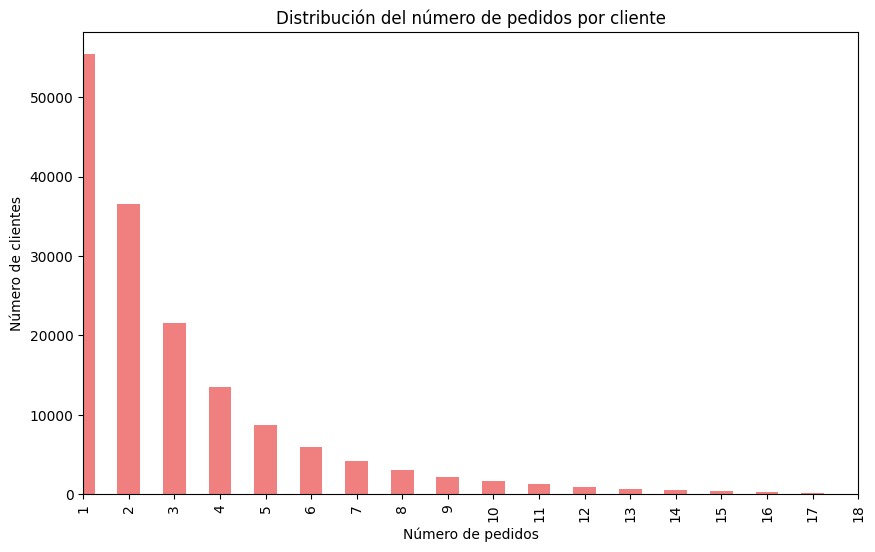

In [77]:
orders_count.plot(kind='bar',
                  color='lightcoral',
                  figsize=(10, 6),
                  title='Distribución del número de pedidos por cliente',
                  xlabel='Número de pedidos',
                  ylabel='Número de clientes')

plt.xlim(0, 17)
plt.show()

Escribe aquí tus conclusiones

Analizando la gráfica anterior, se puede notar que el mayor número de pedidos es realizado por los clientes con un promedio de uno, y se puede observar que la gráfica sigue una forma descendente, es decir, a mayor número de pedidos, se reduce el número de clientes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [78]:
top_20_products = df_order_products['product_id'].value_counts().head(20)

print(top_20_products)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [79]:
top_20_product_names = df_products[df_products['product_id'].isin(top_20_products.index)]

print(top_20_product_names)

       product_id              product_name  aisle_id  department_id  \
5875         5876             Organic Lemon        24              4   
8276         8277  Apple Honeycrisp Organic        24              4   
13175       13176    Bag of Organic Bananas        24              4   
16796       16797              Strawberries        24              4   
21136       21137      Organic Strawberries        24              4   
21902       21903      Organic Baby Spinach       123              4   
22934       22935      Organic Yellow Onion        83              4   
24851       24852                    Banana        24              4   
24963       24964            Organic Garlic        83              4   
26208       26209                     Limes        24              4   
27844       27845        Organic Whole Milk        84             16   
27965       27966       Organic Raspberries       123              4   
28203       28204        Organic Fuji Apple        24           

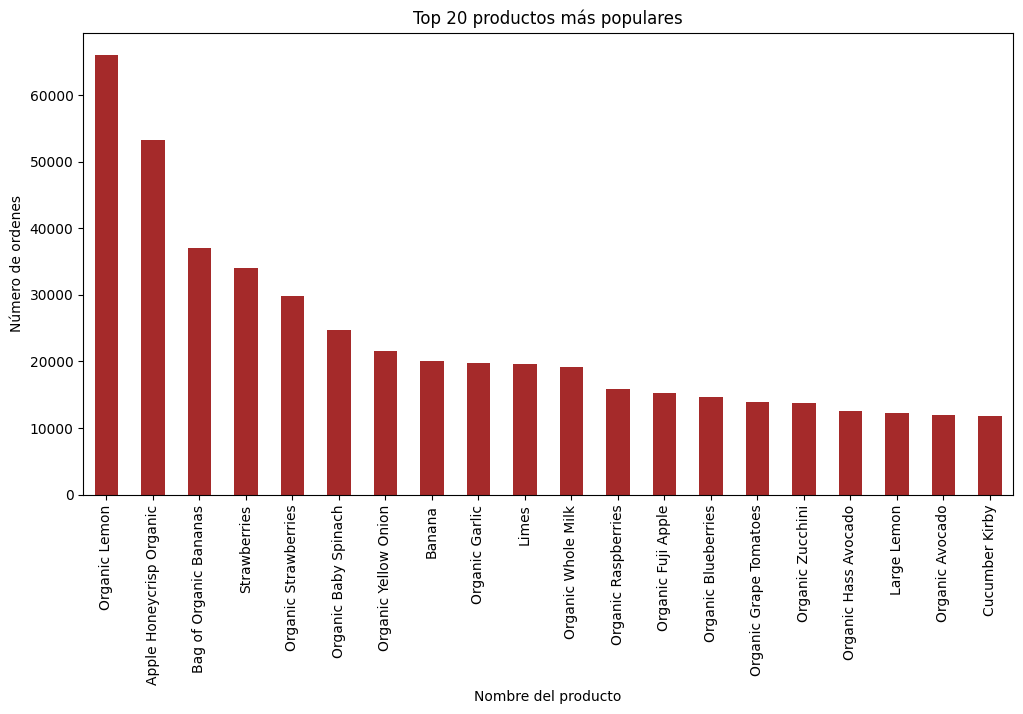

In [80]:
top_20_products_info = pd.DataFrame({
    'product_id': top_20_products.index,
    'order_count': top_20_products.values,
    'product_name': top_20_product_names['product_name'].values
})


top_20_products_info.plot(title= 'Top 20 productos más populares',
                          kind='bar',
                          x='product_name',
                          y='order_count',
                          legend=False,
                          color='brown',
                          figsize=(12, 6),
                         xlabel='Nombre del producto',
                          ylabel="Número de ordenes"
                         )


plt.show()

Escribe aquí tus conclusiones


Como se puede notar en la tabla de arriba, el producto más vendido es el "Organic Lemon" con ID "5876" y el menos vendido es el "Cucumber Kirby" con ID "49682".

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [81]:
articulos_por_pedido = df_order_products.groupby('order_id').size()

In [82]:
estadisticas = articulos_por_pedido.describe()
print(estadisticas)

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


Escribe aquí tus conclusiones

En promedio, las personas colocan 10 artículos en su carrito, con una distribución que va desde un mínimo de 1 producto hasta un máximo de 127 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [83]:
repeated_products = df_order_products[df_order_products['reordered'] == 1]
repeated_product_counts = repeated_products['product_id'].value_counts().head(20)

print(repeated_product_counts)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [84]:
top_20_repeated_products = repeated_product_counts.index.to_frame(name='product_id') \
    .merge(df_products[['product_id', 'product_name']], on='product_id')

print(top_20_repeated_products)

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        27845        Organic Whole Milk
7        47626               Large Lemon
8        27966       Organic Raspberries
9        16797              Strawberries
10       26209                     Limes
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       49683            Cucumber Kirby
15       28204        Organic Fuji Apple
16        8277  Apple Honeycrisp Organic
17       39275       Organic Blueberries
18        5876             Organic Lemon
19       49235       Organic Half & Half


Escribe aquí tus conclusiones


El producto que más se repite es la banana, con un ID de "24852", y el último producto de los 20 que más se repiten es el "Organic Half & Half", con un ID de 49235.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [85]:
product_counts = df_order_products.groupby('product_id').size()
reordered_counts = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()

In [86]:
proporcion_repetidos = reordered_counts / product_counts
print(proporcion_repetidos)

product_id
1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64


In [87]:
proporcion_repetidos_df = proporcion_repetidos.to_frame(name='proporcion_repetidos').reset_index()
proporcion_repetidos_df = proporcion_repetidos_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

print(proporcion_repetidos_df.sort_values('proporcion_repetidos', ascending=False).head(20))

       product_id  proporcion_repetidos  \
10973       12038                   1.0   
1646         1809                   1.0   
33130       36122                   1.0   
2929         3205                   1.0   
38398       41901                   1.0   
42526       46398                   1.0   
9464        10378                   1.0   
28455       31026                   1.0   
42558       46437                   1.0   
19043       20787                   1.0   
1651         1814                   1.0   
42566       46445                   1.0   
26764       29168                   1.0   
23654       25777                   1.0   
40224       43895                   1.0   
28442       31011                   1.0   
5927         6490                   1.0   
1643         1806                   1.0   
1642         1805                   1.0   
14718       16106                   1.0   

                                            product_name  
10973           for Women Maximum Abs

Escribe aquí tus conclusiones

Al hacer el analisis se puede notar que proporción de las veces que se pide y que se vuelve a pedir un producto es en promedio de 1.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [88]:
df_order_info = pd.merge(df_order_products, df_instacart_orders[['order_id', 'user_id']], on='order_id', how='left')
df_order_info = pd.merge(df_order_info, df_products[['product_id', 'product_name']], on='product_id', how='left')

In [89]:
proporcion_repetidos = df_order_info.groupby('user_id').agg(
    total_productos=('product_id', 'count'),
    productos_repetidos=('reordered', 'sum')
)

In [90]:
proporcion_repetidos['proporcion_repetidos'] = proporcion_repetidos['productos_repetidos'] / proporcion_repetidos['total_productos']

print(proporcion_repetidos[['proporcion_repetidos']])

         proporcion_repetidos
user_id                      
2                    0.038462
4                    0.000000
5                    0.666667
6                    0.000000
7                    0.928571
...                       ...
206203               0.222222
206206               0.714286
206207               0.891304
206208               0.696000
206209               0.320000

[149626 rows x 1 columns]


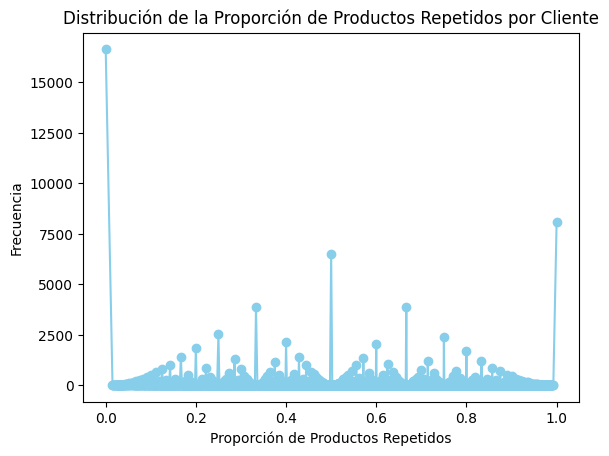

In [91]:
proporcion_repetidos_counts = proporcion_repetidos['proporcion_repetidos'].value_counts().sort_index()

proporcion_repetidos_counts.plot(
    title='Distribución de la Proporción de Productos Repetidos por Cliente',
    color='skyblue',
    marker='o',
    linestyle='-',
    markersize=6,
    xlabel='Proporción de Productos Repetidos',
    ylabel='Frecuencia'
)

plt.show()

En la gráfica y los datos anteriores, se puede notar que la distribución de productos que el cliente ya había pedido, en promedio, es menor a 1 para la mayoría de los clientes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [92]:
first_products = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_products_count = first_products['product_id'].value_counts().head(20)

print(first_products_count)

24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
22935     1246
Name: product_id, dtype: int64


In [93]:
top_20_first_products = first_products_count.index.to_frame(name='product_id') \
.merge(df_products[['product_id', 'product_name']], on='product_id')
print(top_20_first_products[['product_name', 'product_id']])

                   product_name  product_id
0                        Banana       24852
1        Bag of Organic Bananas       13176
2            Organic Whole Milk       27845
3          Organic Strawberries       21137
4          Organic Hass Avocado       47209
5          Organic Baby Spinach       21903
6               Organic Avocado       47766
7                  Spring Water       19660
8                  Strawberries       16797
9           Organic Raspberries       27966
10   Sparkling Water Grapefruit       44632
11          Organic Half & Half       49235
12                  Large Lemon       47626
13                         Soda         196
14     Organic Reduced Fat Milk       38689
15                        Limes       26209
16                Hass Avocados       12341
17  Organic Reduced Fat 2% Milk        5785
18                  Half & Half       27086
19         Organic Yellow Onion       22935


Escribe aquí tus conclusiones

Al identificar los productos que los clientes vuelven a poner en sus carritos se puede identificar que nuevamente la banana es el primer producto, sin embargo el último producto que las personas ponen primero en su carrito cambia y es el producto "Organic Yellow Onion"

### Conclusion general del proyecto:

In [94]:
#Como conclusión general del proyecto, se puede mencionar que, primero, se identificó que el tipo de datos coincidiera con la información de los data frames y, en su defecto, se cambiaron los que no estuvieran correctos. En la segunda parte, fue importante tratar de identificar los valores ausentes y duplicados para saber cómo tratarlos y qué hacer con ellos, para que esto no afectara el análisis y sus gráficas. Por último, al obtener la información en cada punto, se crearon las tablas, las cuales pudieran ser sencillas de entender para futuros dueños de negocio o inversionistas. Todo lo anterior es importante para tener un análisis completo y correcto.